In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]



CPI = pd.read_csv("/kaggle/input/province-inflation-rate/18100004.csv", low_memory=False)
interest_rate_canada = pd.read_csv("/kaggle/input/prov-interest-rate/interest.csv", low_memory=False)

# ****Extract monthly Consumer Price Index (CPI) data from CSV files****

In [2]:
CPI = CPI[CPI['Products and product groups']=='All-items']
CPI = CPI.loc[(CPI['REF_DATE'] >= '2019-12')
                                   & (CPI['REF_DATE'] <= '2022-11')]
CPI = CPI.filter(regex = 'VALUE|GEO|REF_DATE' , axis = 1)
CPI = CPI[CPI["GEO"].str.contains(",|Canada") == False]

print(CPI)

        REF_DATE                        GEO  VALUE
991393   2019-12  Newfoundland and Labrador  139.6
991534   2019-12       Prince Edward Island  138.4
991674   2019-12                Nova Scotia  137.9
991815   2019-12              New Brunswick  136.4
991956   2019-12                     Quebec  132.4
...          ...                        ...    ...
1062007  2022-11                    Ontario  155.4
1062157  2022-11                   Manitoba  157.0
1062297  2022-11               Saskatchewan  157.0
1062442  2022-11                    Alberta  161.6
1062586  2022-11           British Columbia  148.1

[360 rows x 3 columns]


In [3]:
CPI = CPI.sort_values(by=['GEO'])

print(CPI)

        REF_DATE           GEO  VALUE
1004676  2020-06       Alberta  145.0
1042710  2022-01       Alberta  152.8
1040737  2021-12       Alberta  151.7
1016808  2020-12       Alberta  144.8
1038764  2021-11       Alberta  151.6
...          ...           ...    ...
1024749  2021-04  Saskatchewan  143.9
1014639  2020-11  Saskatchewan  141.6
1042565  2022-01  Saskatchewan  147.8
1006551  2020-07  Saskatchewan  141.4
1032700  2021-08  Saskatchewan  144.9

[360 rows x 3 columns]


In [4]:
repeat_ls_prov = CPI[CPI.columns[1:2]].to_numpy()

province = []
for i in range(len(repeat_ls_prov)):
    for j in range(len(repeat_ls_prov[i])):
        province += [repeat_ls_prov[i][j]]

In [5]:
prov_name = []

for prov in range(len(province)):
    if (prov % 36 == 0):
        prov_name += [province[prov]]
        
print(prov_name)

['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan']


# ****calculated corresponding inflation rates from CPI****

In [6]:
y_axis = []

def find_y_axis(prov_name):
    x = CPI[CPI['GEO']==(prov_name)].sort_values(by=['REF_DATE'])
    cpi_value = x[x.columns[2:3]].to_numpy()
    
    em_list = []
    for i in range(len(cpi_value)):
        for j in range(len(cpi_value[i])):
            em_list += [cpi_value[i][j]]
            
    y_axis = []         
    for m in range(len(em_list)):
        y_axis += [round(((em_list[m] - em_list[m - 1]) / em_list[m - 1] * 100), 2)]
    
    return y_axis

print(find_y_axis('Alberta'))

[-11.08, 0.7, 0.55, -0.96, -0.76, 0.77, 0.62, -0.07, -0.48, 0.55, 0.14, 0.14, -0.41, 0.69, 0.41, 0.34, 0.54, 0.61, 0.2, 0.94, 0.47, -0.13, 0.46, 0.07, 0.07, 0.73, 1.11, 1.29, 0.32, 1.4, 1.38, 0.0, -0.87, 0.06, 1.06, -0.12]


# ****Applied the appropriate time filtration process to correspond with inflation rates.****

In [7]:
def find_x_axis(prov_name):
    x = CPI [CPI['GEO']==(prov_name)].sort_values(by=['REF_DATE'])
    date_value = x[x.columns[0:1]].to_numpy()
    
    date = []
    for i in range(len(date_value)):
        for j in range(len(date_value[i])):
            date += [date_value[i][j]]
    return date
print(find_x_axis('Alberta'))

['2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']


# Constructed graphs with time represented on the x-axis and inflation rate on the y-axis for each Canadian Provinces 

In [8]:
for i in range(len(prov_name)):
    plt.figure()
    
    x = find_x_axis(prov_name[i])
    y = find_y_axis(prov_name[i])
    
    
    fig = px.line(x = x, y = y, title = prov_name[i]).update_layout(xaxis_title="Date", yaxis_title="Inflation Rate")
 
    fig.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Applied the appropriate time filtration process for interest rate

In [9]:

interest_x_value = interest_rate_canada.sort_values(by=['Date'])
interest_x_value = interest_x_value[interest_x_value.columns[0:1]].to_numpy()
interest_date = []
for i in range(len(interest_x_value)):
    for j in range(len(interest_x_value[i])):
        interest_date += [interest_x_value[i][j]]

print(interest_date)

['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']


# Get y (interest rate) value for interst graph

In [10]:
interest_rate_canada = interest_rate_canada.sort_values(by=['Date'])
interest_y_value = interest_rate_canada.filter(regex = 'Interest Rate', axis = 1)
interest_y_value = interest_y_value[interest_y_value.columns[0:1]].to_numpy()
interest_y = []

for i in range(len(interest_y_value)):
    for j in range(len(interest_y_value[i])):
        interest_y += [interest_y_value[i][j]]

print(interest_y)

[2.0, 2.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 1.25, 1.25, 1.75, 2.75, 2.75, 3.5, 3.5, 4.0]


In [11]:
plt.figure()
    
fig = px.line(x = interest_date, y = interest_y, title = 'Canada Interest Rate').update_layout(xaxis_title="Date", yaxis_title="Interest Rate")
 
fig.show()
    

<Figure size 640x480 with 0 Axes>

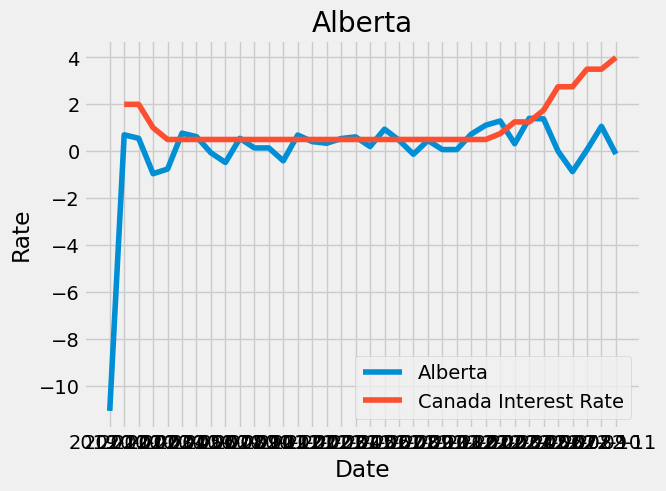

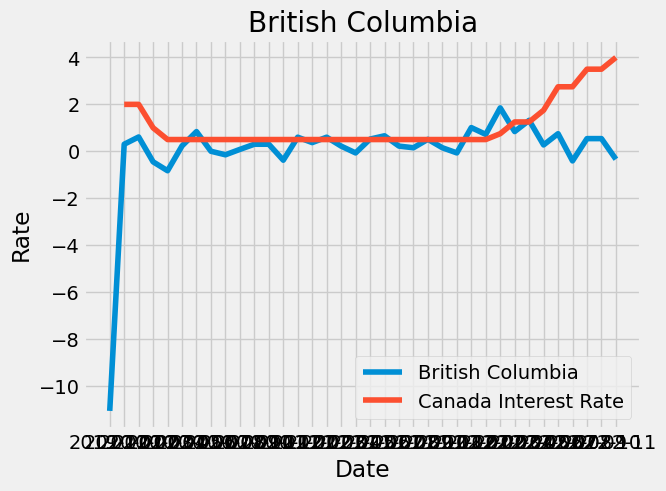

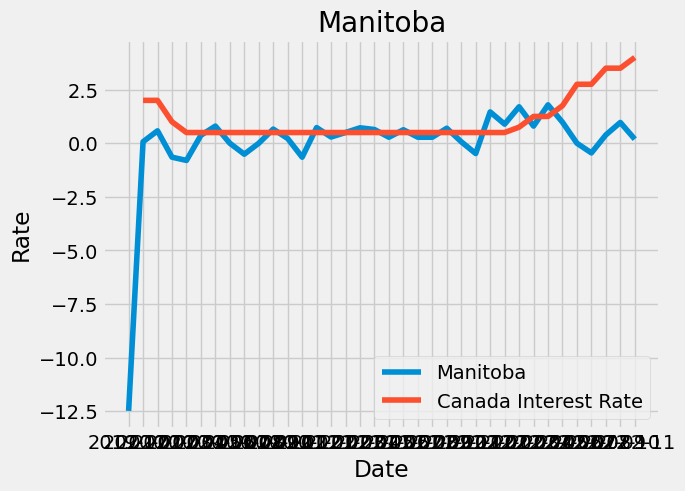

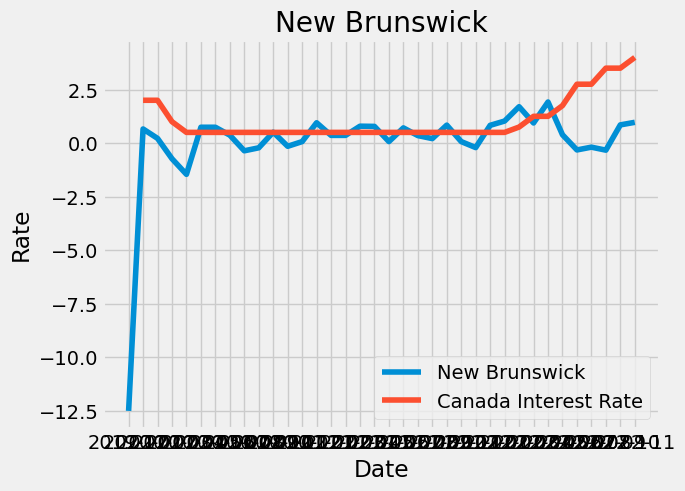

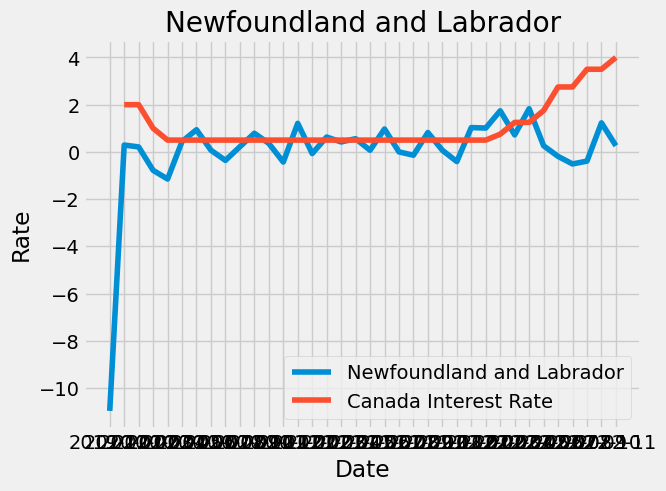

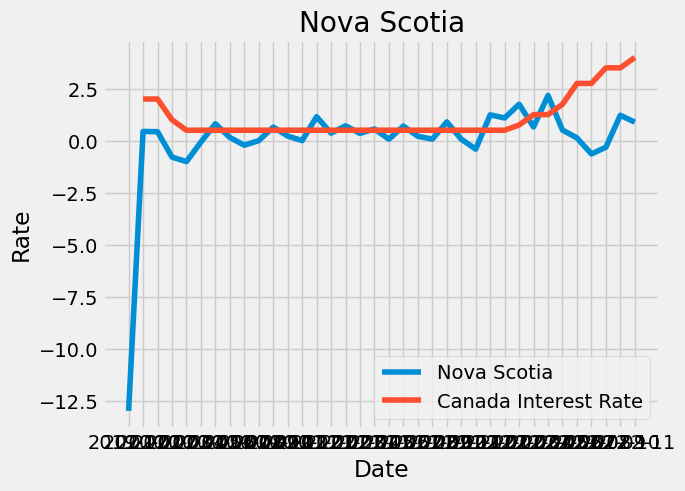

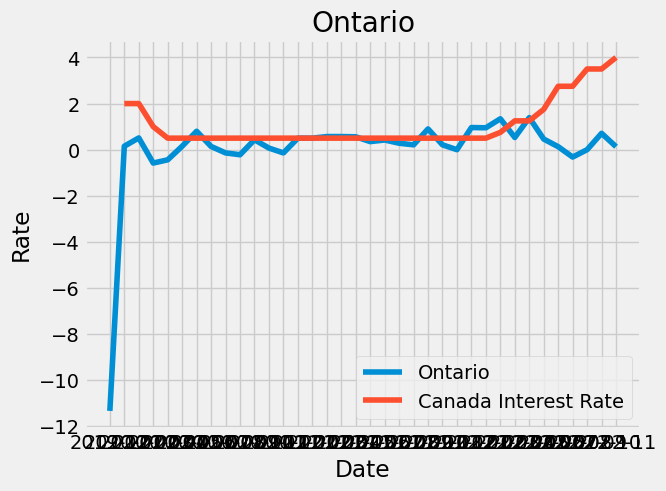

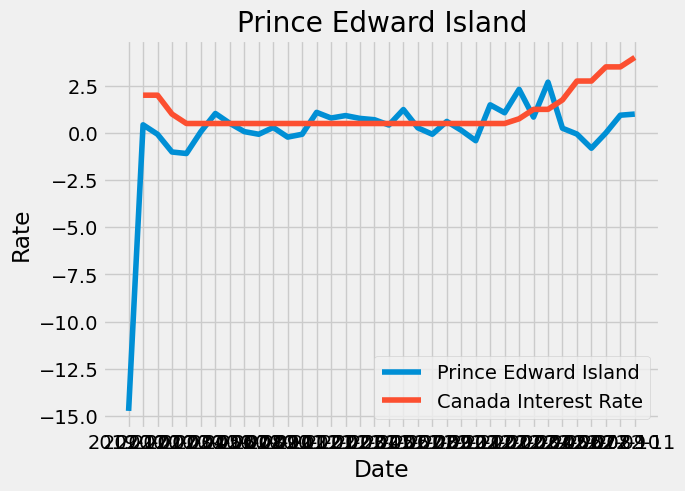

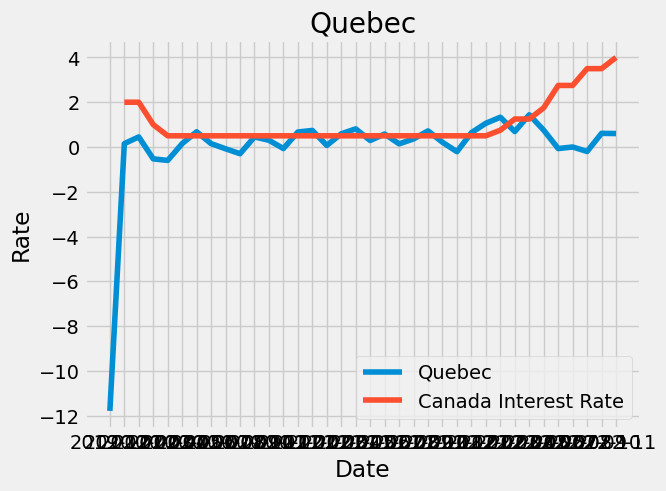

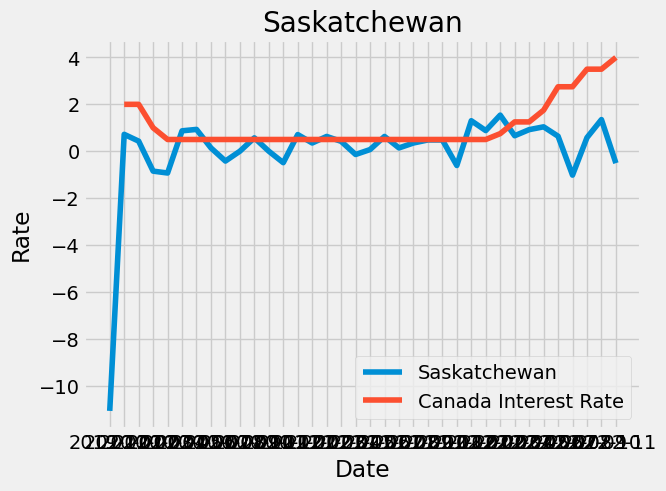

In [12]:
for i in range(len(prov_name)): 
    plt.figure()
    x = find_x_axis(prov_name[i])
    y = find_y_axis(prov_name[i])

    plt.plot(x, y, label = prov_name[i])
    plt.plot(interest_date, interest_y, label = 'Canada Interest Rate')

    plt.title(prov_name[i])
    plt.xlabel('Date')
    plt.ylabel('Rate')
    plt.legend()

    plt.show()